## ДЗ №2 10.11.2020 Тропин Николай

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

#### Зафиксируем размер выборки:

In [40]:
n = 1000

#### Зафиксируем количество выборок:

In [41]:
s = 100

#### Истинное значение параметра:

In [42]:
theta = 1

#### Максимальная степень момента:

In [43]:
k = 100

#### Введём вспомогательные функции для вычисления СКО и отображения результатов:

In [44]:
def calculate_rmse(estimate_values_arr):
    """This function calculates root mean square error for given array of estimate values"""
    for ind in range(len(estimate_values_arr)):
        estimate_values_arr[ind] = (estimate_values_arr[ind] - theta) ** 2
    return sqrt(sum(estimate_values_arr) / s)

In [45]:
def draw_error(RMSE_for_given_k, *, function):
    """This function draw root mean square error graph"""
    x, y = [_ for _ in range(1, k + 1)], RMSE_for_given_k
    plt.title("Root Mean Square Error depending on the k")
    plt.plot(x, y, label=f"{function}")
    plt.legend()
    plt.xlabel("k")
    plt.ylabel("RMSE")
    plt.show()

#### Получим массив оценок и СКО для них для s выборок из равномерного распределения:

In [46]:
samples = np.random.uniform(size=(s, n))
RMSE_for_given_k = []
for i in range(1, k + 1):
    estimate_value = np.power((i + 1) * np.mean(np.power(samples, i), axis=1), 1 / i)
    rmse_err = calculate_rmse(estimate_value)
    RMSE_for_given_k.append(rmse_err)

#### Отобразим на графике полученные измерения:

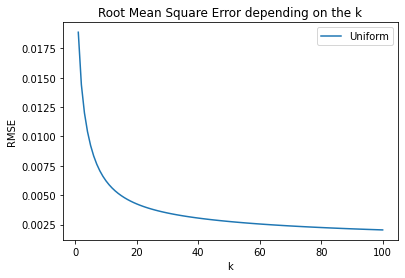

In [47]:
draw_error(RMSE_for_given_k, function="Uniform")

#### Получим массив оценок и СКО для них для s выборок из экспоненциального распределения:

In [48]:
samples = np.random.exponential(size=(s, n))
RMSE_for_given_k = []
for i in range(1, k + 1):
    estimate_value = np.power(np.mean(np.power(samples, i) / np.math.factorial(i), axis=1), 1 / i)
    rmse_err = calculate_rmse(estimate_value)
    RMSE_for_given_k.append(rmse_err)

#### Отобразим на графике полученные измерения:

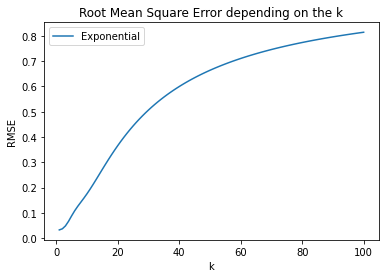

In [49]:
draw_error(RMSE_for_given_k, function="Exponential")

#### Вывод: для более точной оценки равномерного распределения необходимо брать достаточно большое k, для экспоненциального наоборот - чем меньше k, тем точнее оценка.